In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
fig=px.histogram(df,x="temp")
fig.show()

In [6]:
fig=px.scatter(df,x="hum",y="cnt")
fig.show()

In [7]:
fig=px.line(df,x="temp",y="atemp")
fig.show()

In [8]:
fig=px.scatter(df,x="temp",y="atemp",color="cnt")
fig.show()

In [9]:
fig=px.scatter_3d(df,x="hum",y="windspeed",z="cnt",color="weathersit")
fig.show()

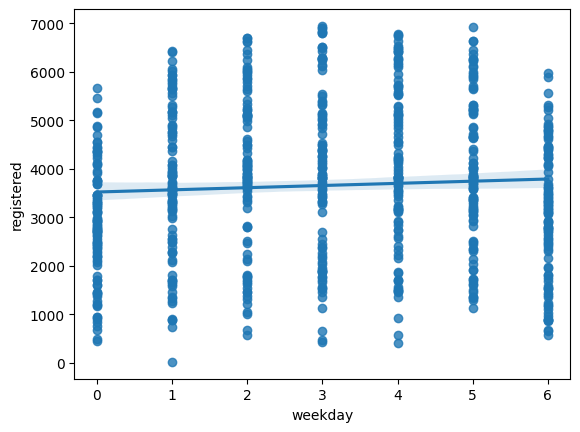

In [10]:
sns.regplot(df,x="weekday",y="registered")
plt.show()

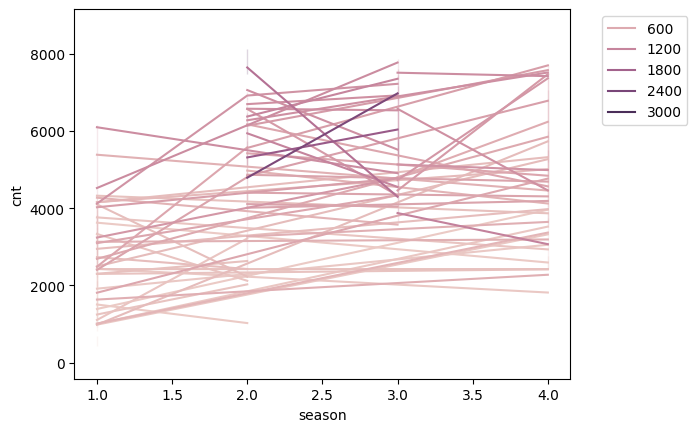

In [11]:
sns.lineplot(df,x="season",y="cnt",hue="casual")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
X=df.drop(columns=["instant","atemp","dteday","casual","registered","yr","cnt"],axis=1)#Dropping columns which are target and redundant
y=df["cnt"]

In [13]:
X.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,1,0,6,0,2,0.344167,0.805833,0.160446
1,1,1,0,0,0,2,0.363478,0.696087,0.248539
2,1,1,0,1,1,1,0.196364,0.437273,0.248309
3,1,1,0,2,1,1,0.200000,0.590435,0.160296
4,1,1,0,3,1,1,0.226957,0.436957,0.186900


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
682,4,11,0,2,1,2,0.343333,0.662917,0.342046
250,3,9,0,4,1,3,0.633913,0.939565,0.192748
336,4,12,0,6,0,1,0.299167,0.612917,0.095783
260,3,9,0,0,0,1,0.507500,0.695000,0.178483
543,3,6,0,3,1,1,0.697500,0.360000,0.271775
...,...,...,...,...,...,...,...,...,...
71,1,3,0,0,0,1,0.384348,0.527391,0.270604
106,2,4,0,0,0,1,0.456667,0.479583,0.303496
270,4,9,0,3,1,2,0.635000,0.848750,0.148629
435,1,3,0,0,0,1,0.361739,0.476957,0.222587


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression=LinearRegression()

In [16]:
cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=4)#Shows score of k-cross validation on training dataset

array([-1985838.21452527, -1639311.17396317, -1835614.56390632,
       -1867995.73692014])

In [17]:
y_train.describe()

count     584.000000
mean     4560.977740
std      1916.243513
min       431.000000
25%      3290.250000
50%      4577.500000
75%      6031.750000
max      8714.000000
Name: cnt, dtype: float64

In [18]:
regression.fit(X,y)#fitting model
reg_predict=regression.predict(X_test)

In [19]:
reg_predict

array([4978.19491831, 2628.51288824, 4042.35779818, 3360.70270431,
       5630.40142455, 6332.24463264, 1944.29802944, 2894.4950484 ,
       6584.60859478, 5289.16906424, 2019.84291363, 3205.77196266,
       5073.88798702, 4444.51361178, 3624.97824655, 3212.96165741,
       3527.81862813, 6446.68544372, 7162.30543542, 1857.78523611,
       6432.85283132, 7403.50096266, 4122.59944029, 2377.78141133,
       2252.78493034, 5786.13586893, 2680.87389974, 5851.25555454,
       3070.23787391, 4606.58840488, 4217.69098381, 5000.4733611 ,
       5156.67610928, 5424.82736571, 4481.32692601, 3650.85994128,
       6140.3672848 , 5076.54612412, 3777.48134981, 1910.63063297,
       5000.60963852, 3090.65463235, 6245.77388297, 4700.6640953 ,
       6263.36326219, 2839.05675712, 6128.35243287, 4096.07647329,
       4911.30598442, 2849.69716241, 4252.672685  , 3762.81297669,
       3040.30639796, 7194.31209462, 5993.27792288, 5312.45569163,
       5280.96244611, 3506.48296148, 4732.03321402, 5955.60007

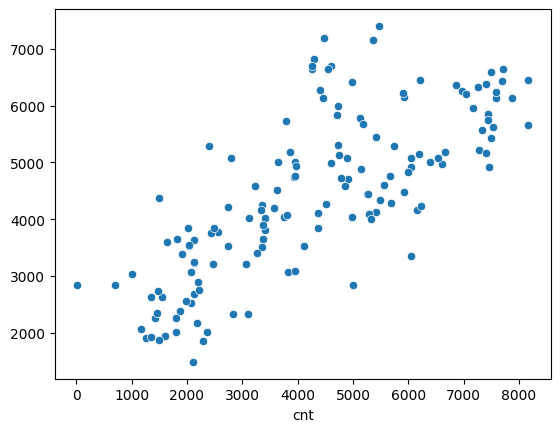

In [20]:
sns.scatterplot(x=y_test,y=reg_predict)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(reg_predict, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(reg_predict, y_test)
r2 = r2_score(reg_predict, y_test)
print("MSE :", mse)
print("RMSE :", rmse)
print("MAE :", mae)
print("R²   :", r2)

MSE : 1760510.8979050838
RMSE : 1326.842454063437
MAE : 1128.577045505025
R²   : 0.1274457185411516


In [22]:
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
682,4,11,0,2,1,2,0.343333,0.662917,0.342046
250,3,9,0,4,1,3,0.633913,0.939565,0.192748
336,4,12,0,6,0,1,0.299167,0.612917,0.095783
260,3,9,0,0,0,1,0.507500,0.695000,0.178483
543,3,6,0,3,1,1,0.697500,0.360000,0.271775
...,...,...,...,...,...,...,...,...,...
71,1,3,0,0,0,1,0.384348,0.527391,0.270604
106,2,4,0,0,0,1,0.456667,0.479583,0.303496
270,4,9,0,3,1,2,0.635000,0.848750,0.148629
435,1,3,0,0,0,1,0.361739,0.476957,0.222587


In [23]:
rt=DecisionTreeRegressor(criterion="squared_error",max_depth=5)
cross_val_score(rt,X_train,y_train,scoring="neg_mean_squared_error",cv=4)

array([-1614954.04891513, -2027769.33080789, -1981674.4516812 ,
       -1947747.71135568])

In [24]:
rt.fit(X_train,y_train)
y_p=rt.predict(X_test)

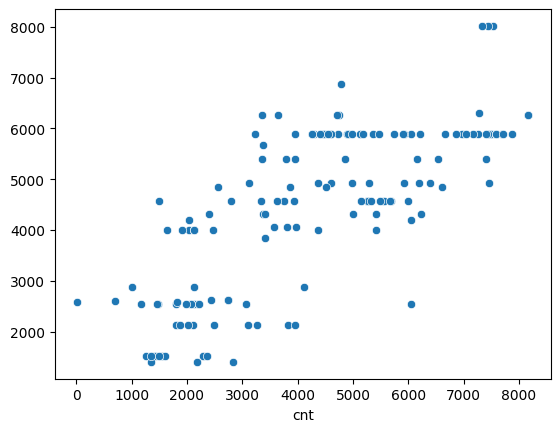

In [25]:
sns.scatterplot(x=y_test,y=y_p)
plt.show()